<a href="https://colab.research.google.com/github/chikii/Machine_Learning/blob/master/min_max_temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Weather Conditions in World War Two:
Is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature? 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/Summary of Weather.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Taking relavent data

In [ ]:
data = data[['MaxTemp','MinTemp']]
data.head()

,MaxTemp,MinTemp
0,25.555556,22.222222
1,28.888889,21.666667
2,26.111111,22.222222
3,26.666667,22.222222
4,26.666667,21.666667


In [ ]:
print(data.size)
print(data.shape)

238080
(119040, 2)


In [ ]:
#checking for null values
data.isnull().sum()

MaxTemp    0
MinTemp    0
dtype: int64

no null values found

## Analysing Data

In [ ]:
#looking for correlation
corr = data.corr()
corr

,MaxTemp,MinTemp
MaxTemp,1.000000,0.878384
MinTemp,0.878384,1.000000


highly positive correlated

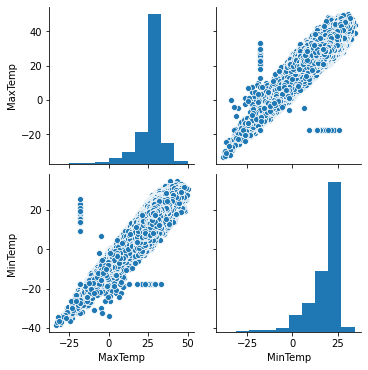

In [ ]:
sns.pairplot(data)
plt.show()

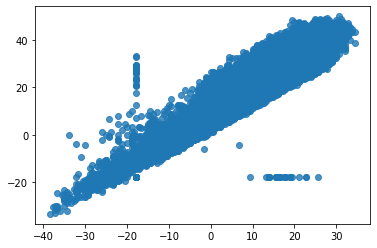

In [ ]:
plt.scatter(data['MinTemp'],data['MaxTemp'],alpha=0.8)

## Removing Outliers

In [ ]:
#outliers ->
#for those min_temp whose greater than 7 and their max_temp is less than  -10
#for those min_temp whose less than -10 and thier max_temp is greater than 10
drop_rows = []
for index in range(data.MinTemp.size):
  if data.MinTemp[index] > 7 and data.MaxTemp[index] < -10:
    drop_rows.append(index)
  elif data.MinTemp[index] < -10 and data.MaxTemp[index] > 10:
    drop_rows.append(index)
  
data = data.drop(drop_rows)

In [ ]:
data.shape

(118985, 2)

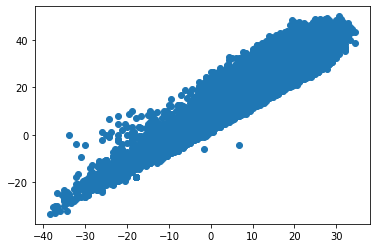

In [ ]:
plt.scatter(data['MinTemp'],data['MaxTemp'])

## Spliting Data

In [ ]:
train_data, test_data = train_test_split(data,test_size=0.2,shuffle = True,random_state=42)

In [ ]:
train_x, train_y = train_data['MinTemp'],train_data['MaxTemp']
test_x, test_y = test_data['MinTemp'],test_data['MaxTemp']

In [ ]:
train_x,train_y = np.array(train_x).reshape(-1,1),np.array(train_y).reshape(-1,1)
test_x,test_y = np.array(test_x).reshape(-1,1),np.array(test_y).reshape(-1,1)

In [ ]:
train_x.shape

(95188, 1)

## Creating a model

In [ ]:
model = LinearRegression()
model.fit(train_x,train_y)
model.score(train_x,train_y)

0.7714008773727123

## testing Model

In [ ]:
test_predict = model.predict(test_x)
score = model.score(test_x,test_y)
score

0.7721546572113719

scored : 0.77753468685159 # removed outliers <br>
scored : 0.7721546572113719 # d o not removed outliers

## ploting best fit line

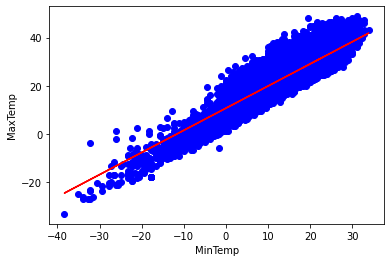

In [ ]:
plt.scatter(test_x,test_y,color = 'b')
plt.plot(test_x,test_predict,color = 'r')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

if we do not remove outliers

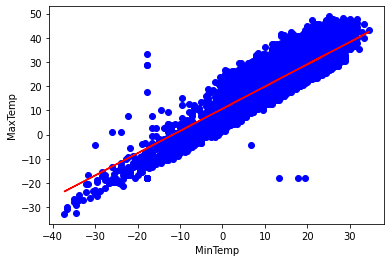

In [ ]:
plt.scatter(test_x,test_y,color = 'b')
plt.plot(test_x,test_predict,color = 'r')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()